<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/ClassDemos/kmeans_interactive_elbowmethod_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

import ipywidgets as ipw
import numpy as np
import pylab as pl
import sklearn.cluster
from sklearn import mixture
from scipy.cluster.vq import kmeans2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


means                         stdev                         
[5.45666567 5.45666567]        [0.46915689 0.54279063]
[0.94540207 4.48670806]        [0.38407172 0.16331601]
[0.34614505 0.92312517]        [0.85282269 0.61000714]
[2.23107017 2.33722378]        [0.30374261 0.42107287]
dataset shape (2, 50)


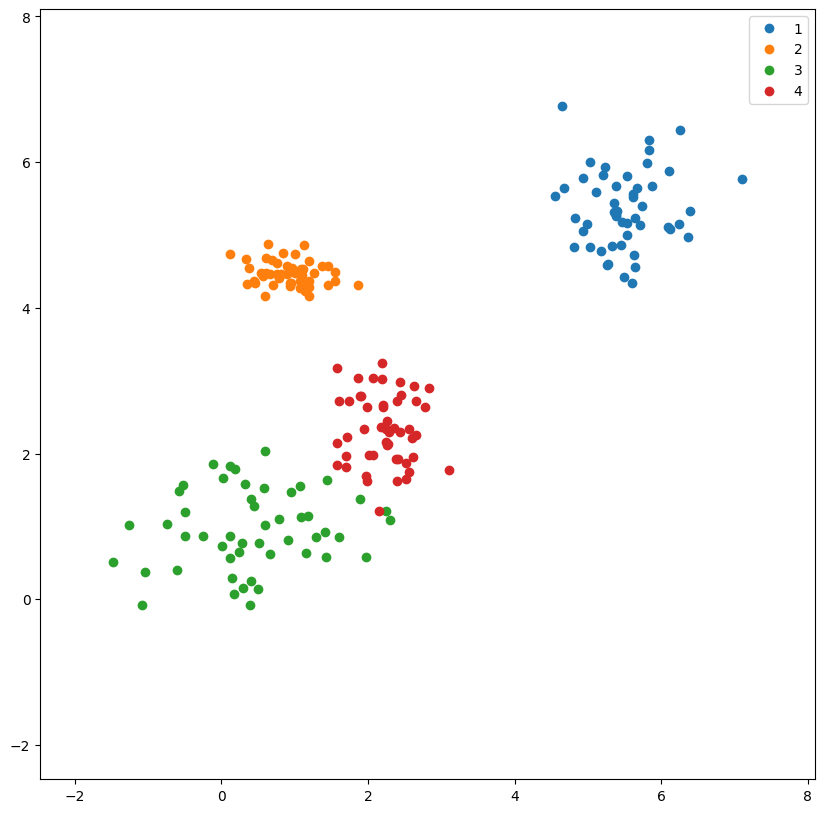

In [13]:
np.random.seed(302)

shiftmean = np.zeros((4,2))
pl.figure(figsize = (10,10))
#comment this to make the problem easier
siftmeans = np.random.randint(0,4, (4,2)) * 5



print(f'{"means":30s}{"stdev":30s}')
# make four groups of points in a 2D space
k1s, k1m = np.random.rand(2), random.rand()*10 + shiftmean[0]
print (f'{k1m}        {k1s}')
k1 = (k1s*np.random.randn(50,2)+k1m).T
k2s, k2m = np.random.rand(2), random.rand(2)*5 + shiftmean[1]
print (f'{k2m}        {k2s}')
k2 = (k2s*np.random.randn(50,2)+k2m).T
k3s, k3m = np.random.rand(2), random.rand(2)*5 + shiftmean[2]
print (f'{k3m}        {k3s}')
k3 = (k3s*np.random.randn(50,2)+k3m).T
k4s, k4m = np.random.rand(2), random.rand(2)*3 + shiftmean[3]
print (f'{k4m}        {k4s}')
k4 = (k4s*np.random.randn(50,2)+k4m).T

#plot the points
pl.plot(k1[0], k1[1], 'o', label='1')
pl.plot(k2[0], k2[1], 'o', label='2')
pl.plot(k3[0], k3[1], 'o', label='3')
pl.plot(k4[0], k4[1], 'o', label='4')

#put the groups together as a single dataset
kall = np.concatenate([k1.T, k2.T, k3.T, k4.T])

#limits of the space (to plot)
lims = (min(min(kall[:,0]), min(kall[:,0]))-1, max(max(kall[:,0]), max(kall[:,1]))+1)
pl.xlim(lims)
pl.ylim(lims)
pl.legend()
print ("dataset shape", k1.shape)

In [14]:

vs = {}
labels={}
nclusters = range(1,26) #[1,2,3,4,5,6,8,10,13,18,25]#,32,64]
# 4 loop over N=1 to N=25 clusters
for j,n_c in enumerate(nclusters):
    #find the clusters for every N
    clf = sklearn.cluster.KMeans(n_clusters=n_c, n_init='auto')
    #get the cluster label for every point
    labels[n_c] = clf.fit_predict(kall) #.reshape(100,2)
    #calculate the intercluster variance for the model
    vs[n_c] = (np.sum([np.std(np.array(
        [kall[:,0][labels[n_c]==l], kall[:,1][labels[n_c]==l]]).T - clf.cluster_centers_[l]) \
                      for l in labels[n_c]]))

In [15]:
def plotclusters(n_c):
    fig = pl.figure(figsize=(16,8))
    #plotting the clusters
    ax1 = pl.subplot(121)

    for l in labels[n_c]:
        if l in labels[n_c]:
            # plot only points in cluster l with color made from l
            pl.plot(kall.T[0][labels[n_c]==l], kall.T[1][labels[n_c]==l], '.',
                       c=pl.cm.plasma.colors[\
                            (l*len(pl.cm.plasma.colors))//n_c], alpha=0.7, ms=10)

    pl.axis('equal')
    #pl.axis([lims[0], lims[1], lims[0], lims[1]])
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)

    pl.grid('off')
    ax1.set_xlabel('x', fontsize=20)
    ax1.set_ylabel('y', fontsize=20)
    ax1.set_title ("%d K-means clusters"%n_c)

    ax2 = pl.subplot(122)
    pl.ylabel("sum of inter-cluster vairances", fontsize=20)
    pl.xlabel("N clusters", fontsize=20)
    pl.plot(vs.keys(), vs.values(), 'o')
    pl.plot(vs.keys(), vs.values(), '-')
    pl.plot(n_c, list(vs.values())[n_c-1], 'rX', ms=14)

    ax2.yaxis.tick_right()
    ax2.set_xlim(1,max(nclusters))

    ax3 = ax2.twinx()
    ax3.set_ylabel('y', fontsize=20)

    ax3.set_xlim(1,max(nclusters))
    ax3.set_ylim(0,350)
    pl.show()
    return fig

In [16]:
@ipw.interact(nclusters=8)
def showclusters(nclusters=2):
    if nclusters > 0:
        plotclusters(nclusters)

interactive(children=(IntSlider(value=8, description='nclusters', max=24, min=-8), Output()), _dom_classes=('w…